## Distribution of the Delay Targets

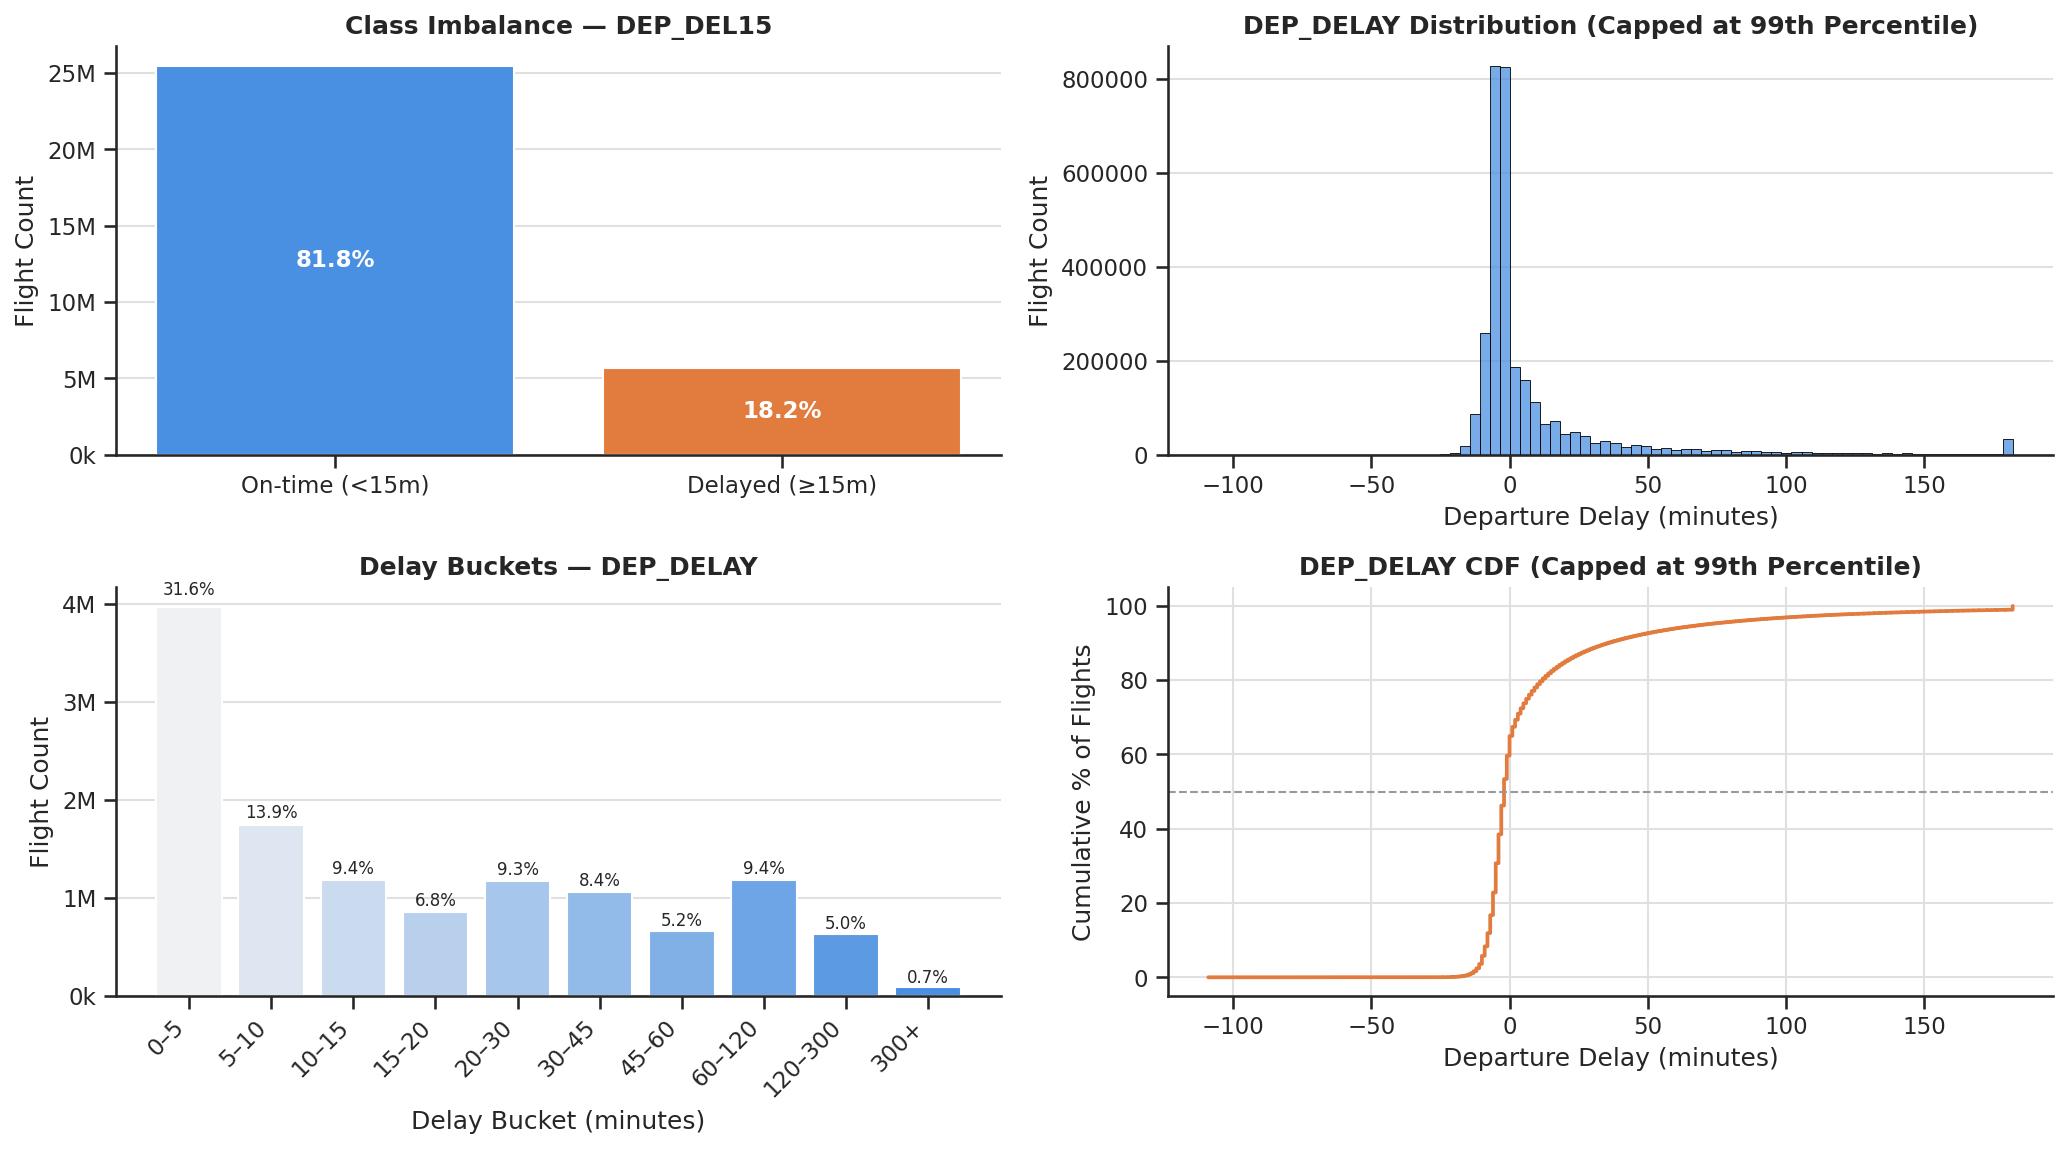

### Insights

Departure delay behavior is both **highly imbalanced** and **strongly right-skewed**. Roughly **82%** of flights depart on time, while only **18%** cross the 15-minute DOT threshold. Most delays are small, but the distribution contains a meaningful tail of **30+ minute** disruptions. The cumulative curve highlights how quickly delay risk accelerates after the median, confirming that both classification and regression require methods robust to rare, high-severity events.

### Modeling Implications

- Requires **non-accuracy metrics** such as F2, recall, and precision.
- Tail behavior justifies **MAE-based regression**, winsorizing, and outlier-robust loss functions.
- Supports a **dual-pipeline**: classification for DEP_DEL15 + regression for severity estimation.
- Most modeling focus should be on the **5–45 minute range**, where delays are common and actionable.

### Business Implications

- Small delays dominate the network and drive passenger experience; reducing them generates outsized impact.
- High-severity delays are rare but operationally costly, needing early warning and recovery protocols.
- Provides clarity on where staffing, scheduling buffers, and gate operations yield the highest ROI.

---

## Weather Effects Panel

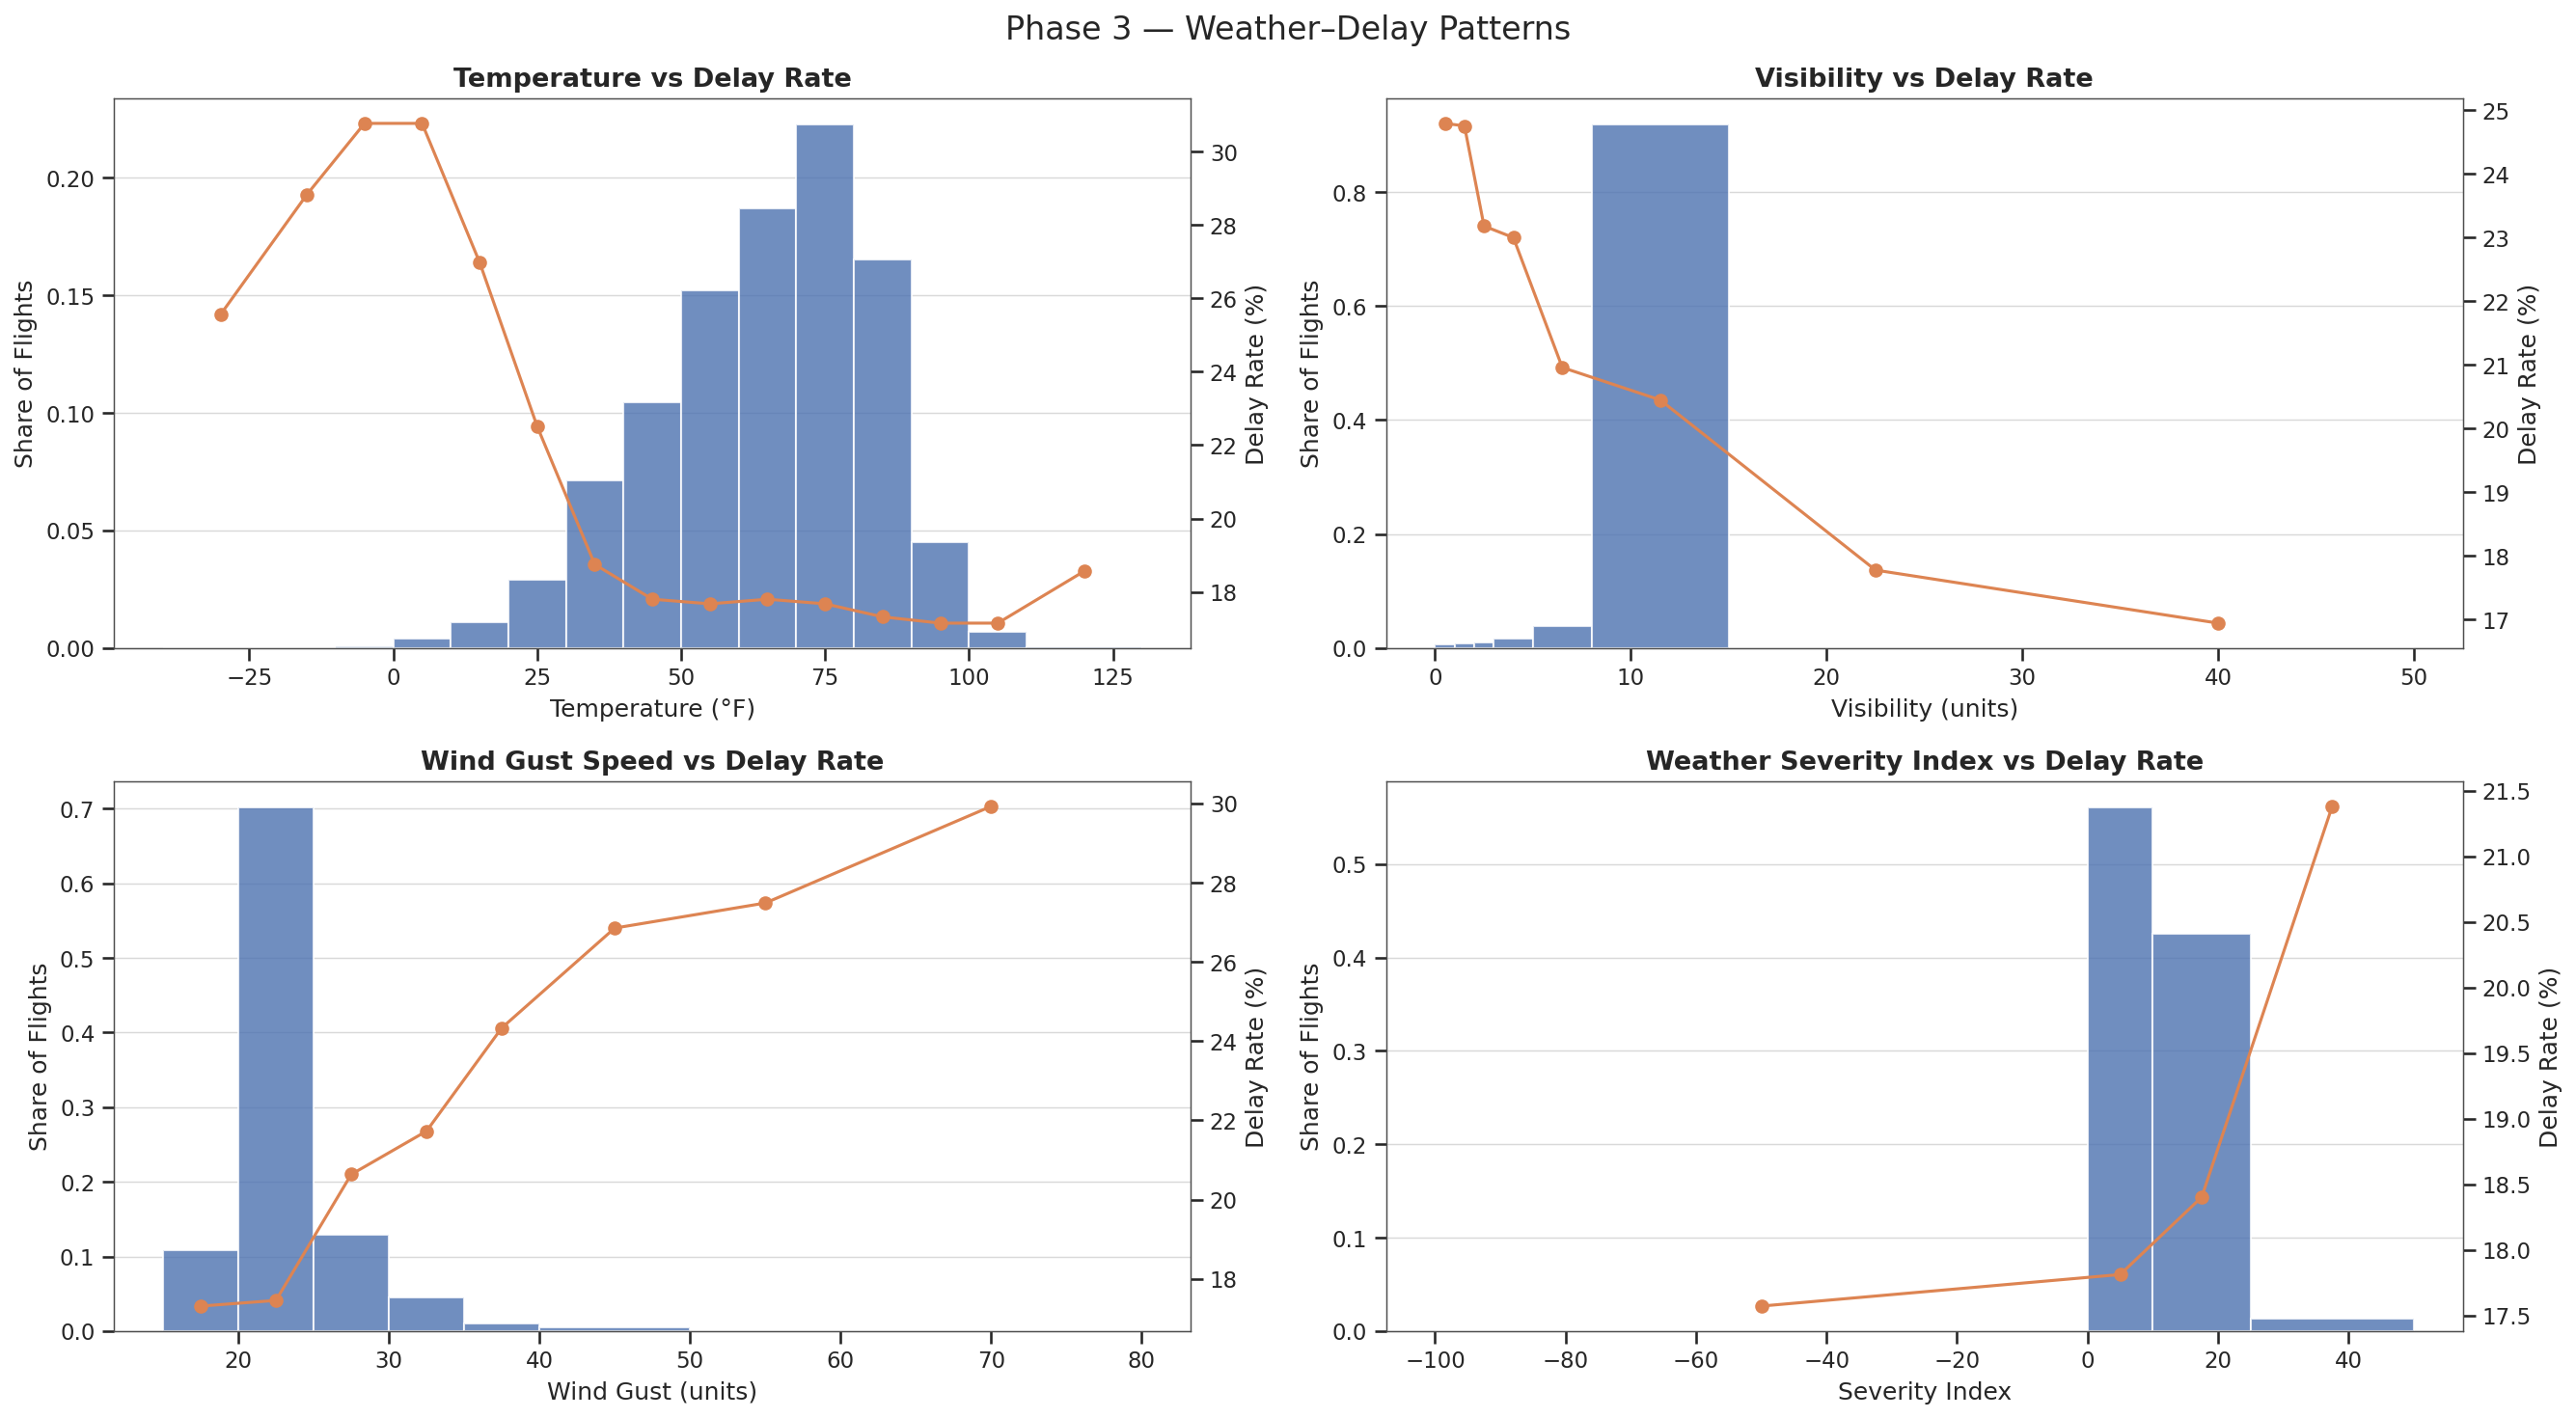

### Insights

Weather variables show **clear monotonic relationships** with delay risk. Low visibility, lower temperatures, and higher wind gusts correspond to higher delay rates. The composite weather severity index strengthens this signal by capturing multi-factor interactions in a single engineered feature.

### Modeling Implications

- Confirms that **weather severity index** is a strong engineered predictor.
- Suggests nonlinear models (e.g., GBT) naturally capture threshold effects (fog, wind spikes).
- Weather interactions with airport congestion justify including both airport-level and meteorological variables.

### Business Implications

- Identifies when weather-driven delays are predictable vs. disruptive.
- Enables proactive rescheduling, gate reassignments, and customer communication.
- Supports risk forecasting dashboards for operational control centers.

---

## Temporal Delay Patterns

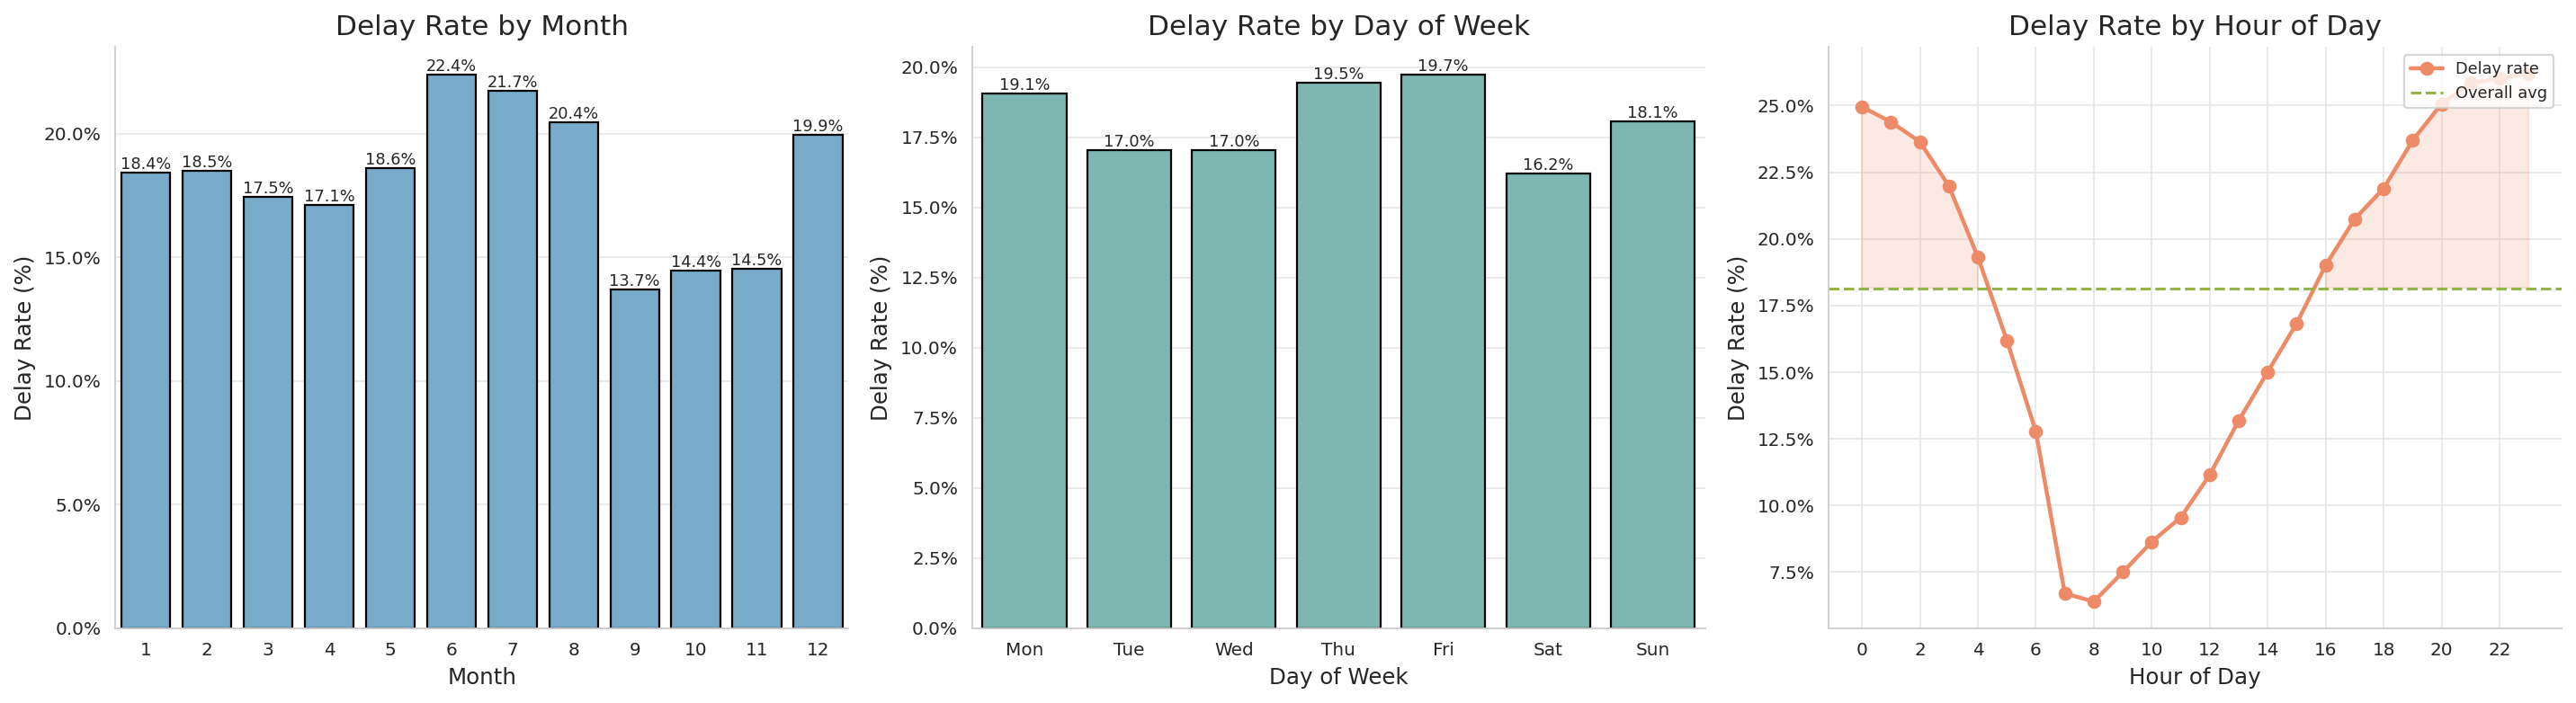

### Insights

Delays follow **strong temporal rhythms**. Delay rates peak in summer and December, rise late in the work week, and remain lowest early in the morning before steadily climbing through the evening as disruptions propagate.

### Modeling Implications

- Treat **month**, **day of week**, and **hour** as core features.
- Time variables interact with congestion, requiring nonlinear modeling.
- Temporal splits (by month/year) reduce leakage and yield realistic performance estimates.

### Business Implications

- Seasonal peaks require increased staffing and schedule slack.
- Thu–Fri patterns indicate compression of operational buffers.
- Morning flights offer reliability advantages; prioritization improves customer satisfaction.

---

## Operational Load by Hour

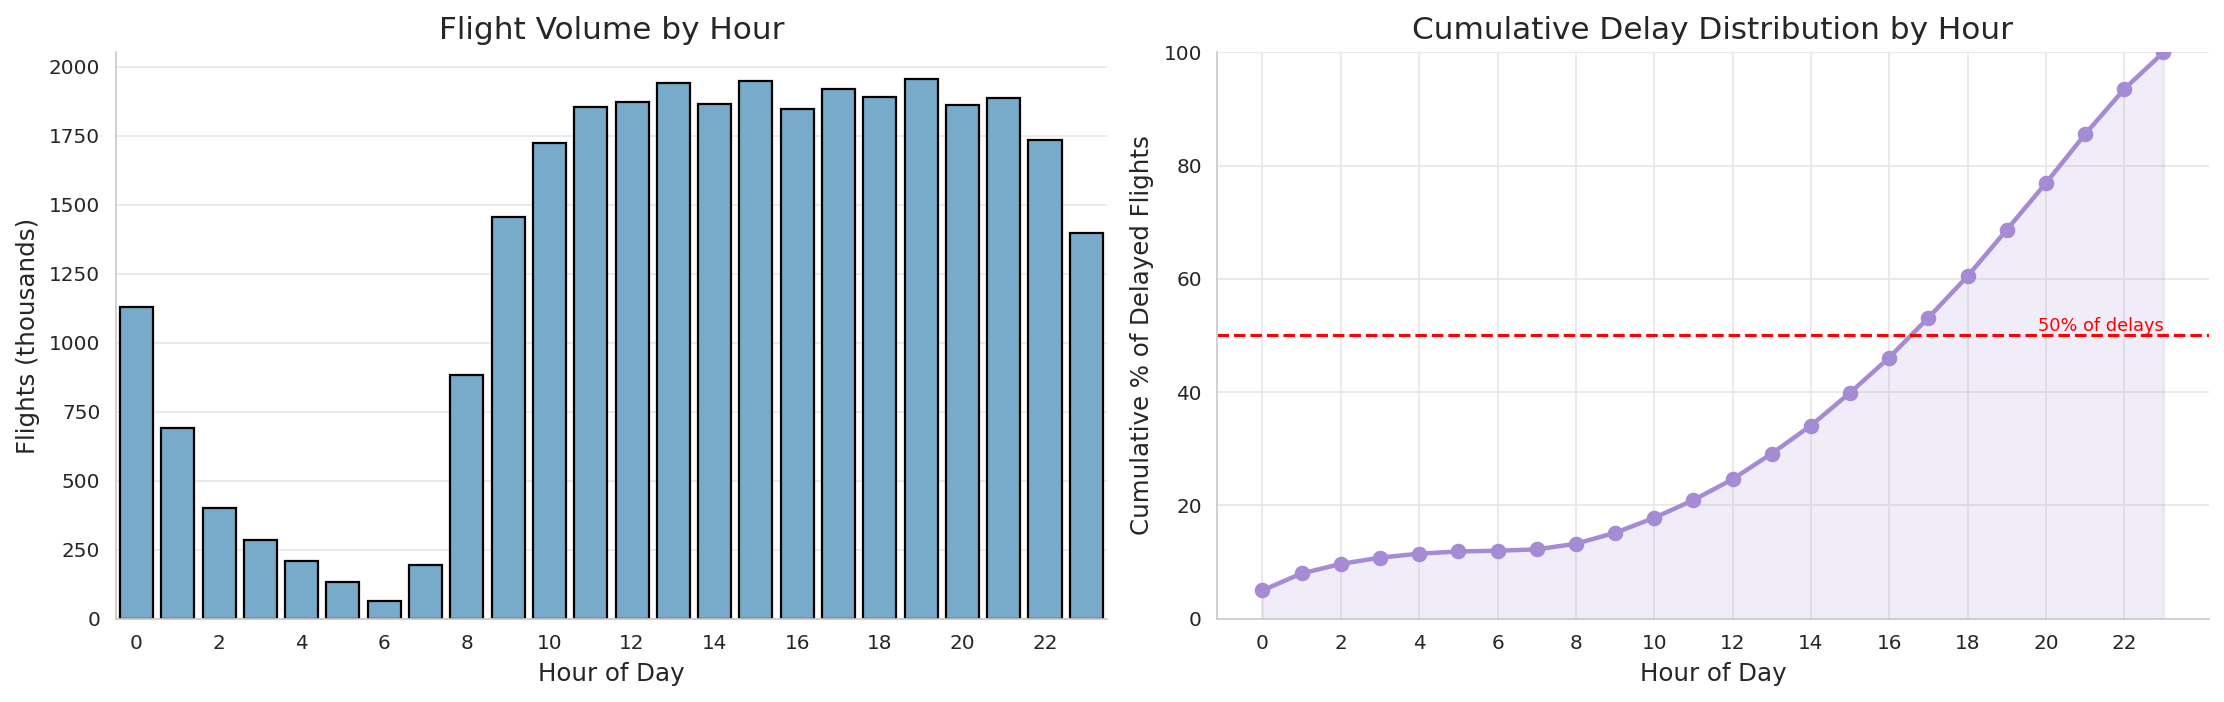

### Insights

Operational pressure spikes during midday and evening departure banks. More than **half of all delays** accumulate after ~5 PM due to propagation, confirming that early-day execution strongly shapes end-of-day performance.

### Modeling Implications

- Hour-of-day interacts strongly with congestion; must pair time features with airport-wide metrics.
- Validates evaluating models across **time-of-day strata**.
- Supports using volatility-aware decision thresholds later in the day.

### Business Implications

- High-volume hours require targeted intervention: more agents, tighter turnarounds, disciplined pushbacks.
- Morning discipline prevents delay cascades.
- Resource allocation should follow **real hourly load**, not average assumptions.

---

In [0]:

# Phase 3 — Auto Display Panels (Insights + Modeling + Business)

import os
from IPython.display import display, Markdown, Image

CHARTS_PHASE3 = "/dbfs/student-groups/Group_4_4/Charts/phase3"

PANELS = [
    {
        "filename": "panel_targets_combined.png",
        "title": "Distribution of the Delay Targets",
        "insights": (
            "Departure delay behavior is both **highly imbalanced** and **strongly right-skewed**. "
            "Departure delays exhibit a strong class imbalance: roughly 82% of flights depart on time, while only 18% exceed the DOT's 15-minute delay threshold. Although most delays remain small, the continuous delay distribution shows a long, meaningful tail of 30+ minute disruptions. The cumulative distribution curve reveals how sharply delay risk accelerates after the median, confirming that a very small portion of flights accounts for a disproportionately large share of operational impact. Because delay minutes are heavily right-skewed, traditional accuracy metrics hide risk. Median delay sits close to zero, yet the 90th percentile jumps to ~30–35 minutes, and beyond this range, the probability of major disruptions rises steeply. Bucket analysis shows short delays dominate in volume, but mid- and high-severity delays (30+ minutes) drive the majority of downstream effects—crew misalignments, gate conflicts, missed connections."
        ),
        "modeling": (
            "- Requires **non-accuracy metrics** such as F2, recall, and precision. The business value lies in catching flights that are truly at risk.\n"

        ),
        "business": (
            "- Small delays dominate the network and drive passenger experience; reducing them generates outsized impact.\n"
            "- High-severity delays are rare but operationally costly, needing early warning and recovery protocols.\n"
            "- Provides clarity on where staffing, scheduling buffers, and gate operations yield the highest ROI."
        ),
    },
    {
        "filename": "panel_weather.png",
        "title": "Weather Effects Panel",
        "insights": (
            "Weather variables show **clear monotonic relationships** with delay risk. Low visibility, lower temperatures, "
            "and higher wind gusts correspond to higher delay rates. The composite weather severity index strengthens "
            "this signal by capturing multi-factor interactions in a single engineered feature."
        ),
        "modeling": (
            "- Confirms that **weather severity index** is a strong engineered predictor.\n"
            "- Suggests nonlinear models (e.g., GBT) naturally capture threshold effects (fog, wind spikes).\n"
            "- Weather interactions with airport congestion justify including both airport-level and meteorological variables."
        ),
        "business": (
            "- Identifies when weather-driven delays are predictable vs. disruptive.\n"
            "- Enables proactive rescheduling, gate reassignments, and customer communication.\n"
            "- Supports risk forecasting dashboards for operational control centers."
        ),
    },
    {
        "filename": "panel_temporal_modelstyle.png",
        "title": "Temporal Delay Patterns",
        "insights": (
            "Delays follow **strong temporal rhythms**. Delay rates peak in summer and December, rise late in the work week, "
            "and remain lowest early in the morning before steadily climbing through the evening as disruptions propagate."
        ),
        "modeling": (
            "- Treat **month**, **day of week**, and **hour** as core features.\n"
            "- Time variables interact with congestion, requiring nonlinear modeling.\n"
            "- Temporal splits (by month/year) reduce leakage and yield realistic performance estimates."
        ),
        "business": (
            "- Seasonal peaks require increased staffing and schedule slack.\n"
            "- Thu–Fri patterns indicate compression of operational buffers.\n"
            "- Morning flights offer reliability advantages; prioritization improves customer satisfaction."
        ),
    },
    {
        "filename": "panel_operational_modelstyle.png",
        "title": "Operational Load by Hour",
        "insights": (
            "Operational pressure spikes during midday and evening departure banks. More than **half of all delays** accumulate "
            "after ~5 PM due to propagation, confirming that early-day execution strongly shapes end-of-day performance."
        ),
        "modeling": (
            "- Hour-of-day interacts strongly with congestion; must pair time features with airport-wide metrics.\n"
            "- Validates evaluating models across **time-of-day strata**.\n"
            "- Supports using volatility-aware decision thresholds later in the day."
        ),
        "business": (
            "- High-volume hours require targeted intervention: more agents, tighter turnarounds, disciplined pushbacks.\n"
            "- Morning discipline prevents delay cascades.\n"
            "- Resource allocation should follow **real hourly load**, not average assumptions."
        ),
    },
]

# Render panels

for panel in PANELS:
    path = os.path.join(CHARTS_PHASE3, panel["filename"])
    if not os.path.exists(path):
        print(f"[skip] Image not found: {path}")
        continue

    display(Markdown(f"## {panel['title']}"))
    display(Image(filename=path, width=1000))

    display(Markdown("### Insights"))
    display(Markdown(panel["insights"]))

    display(Markdown("### Modeling Implications"))
    display(Markdown(panel["modeling"]))

    display(Markdown("### Business Implications"))
    display(Markdown(panel["business"]))

    display(Markdown("---"))


## Correlation Structure of Delay Drivers (Operational, Weather, and Engineered Signals)

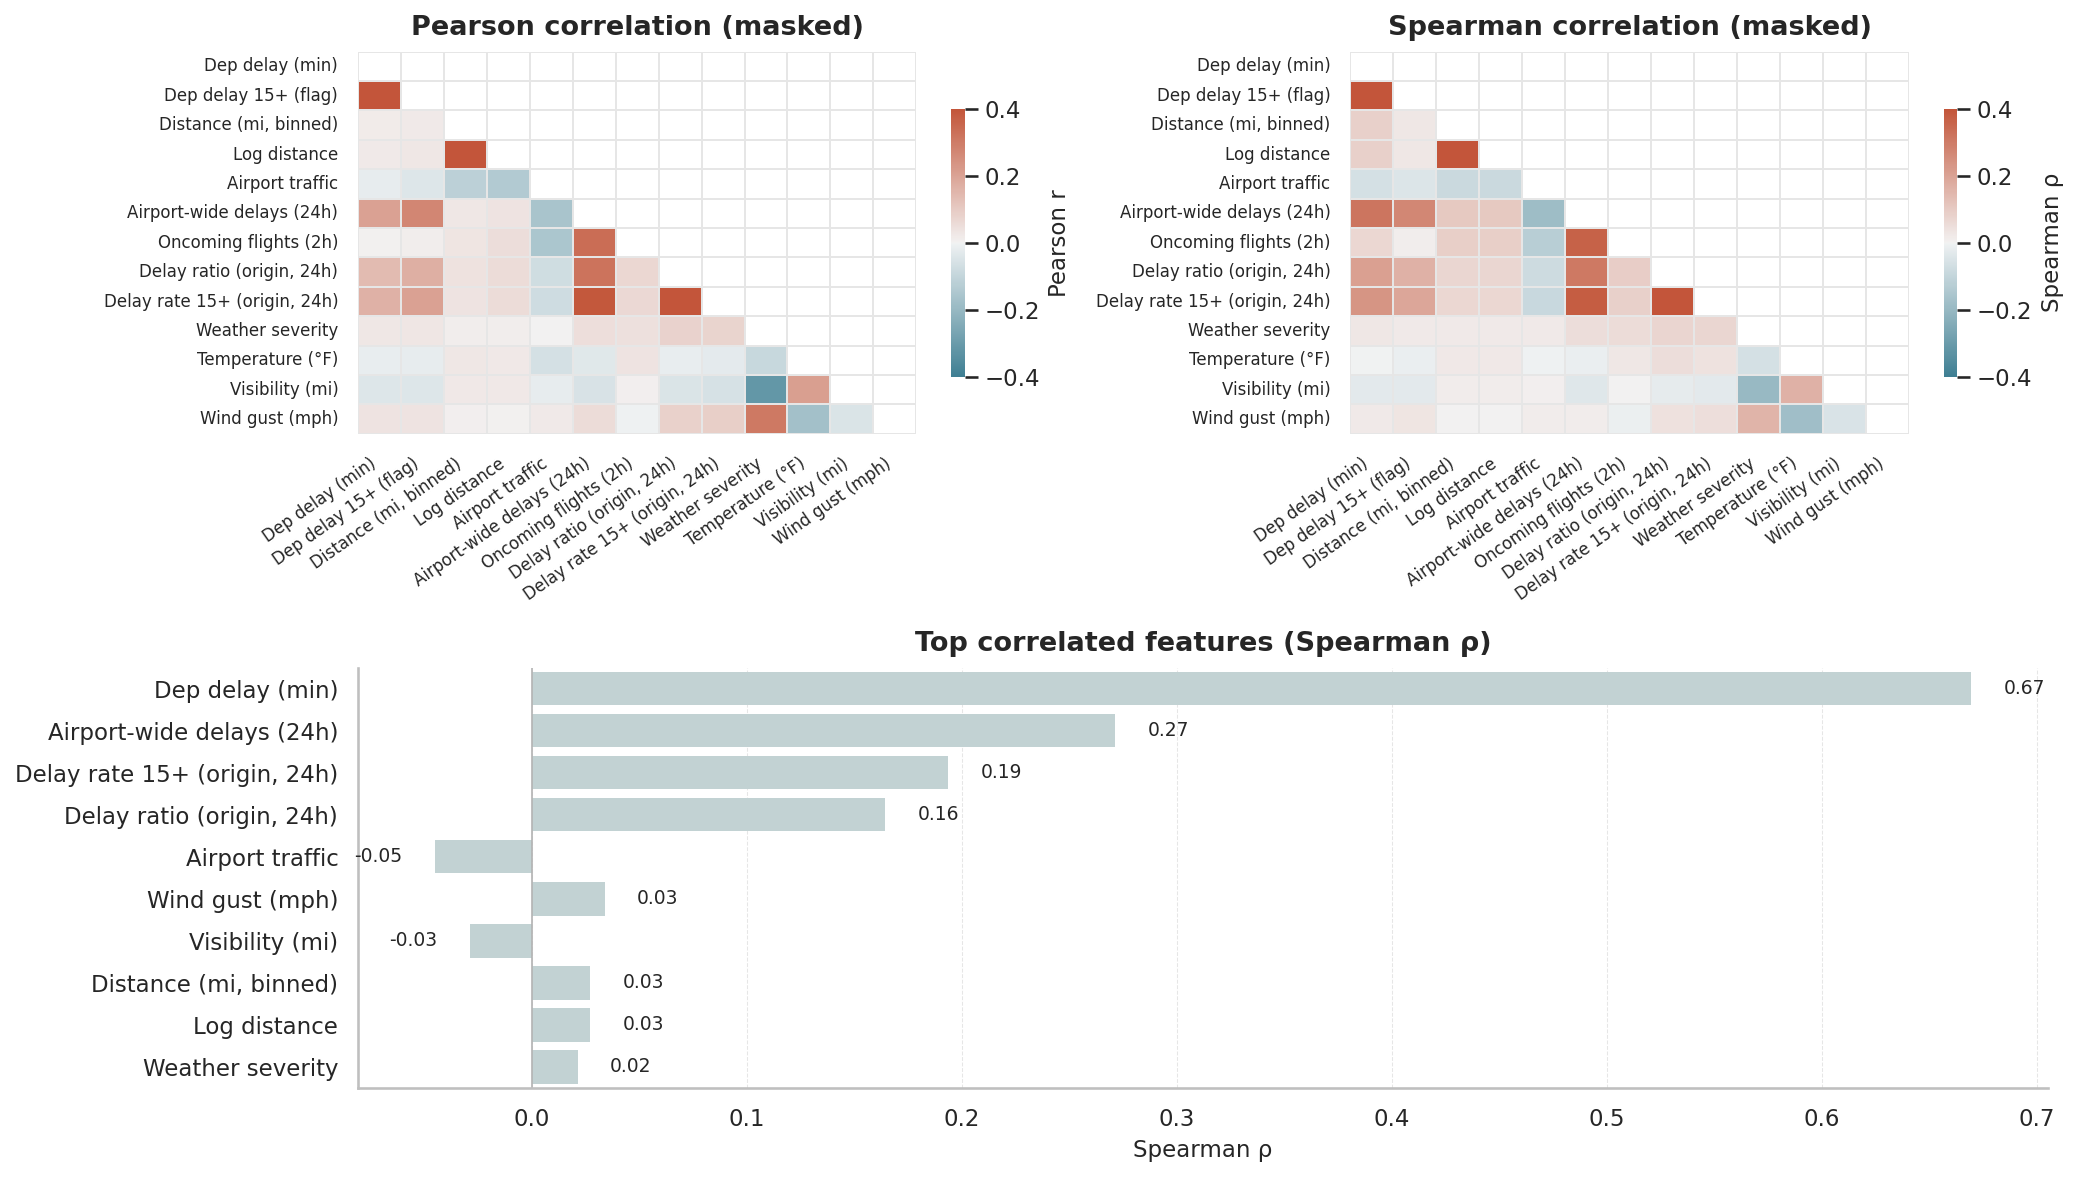

In [0]:
from IPython.display import Image, display, Markdown

# Path where your images were saved
BASE = "/dbfs/student-groups/Group_4_4/Charts/phase3"

# Display the correlation dashboard image
display(Markdown("## Correlation Structure of Delay Drivers (Operational, Weather, and Engineered Signals)"))
display(Image(filename=f"{BASE}/panel_corr_dashboard_masked.png", width=950))

# Append correlation panel metadata to PANELS list for consistent report generation
PANELS.append(
    {
        "filename": "panel_corr_dashboard_masked.png",
        "title": "Correlation Structure of Delay Drivers (Operational, Weather, and Engineered Signals)",
        "insights": (
            "- **Congestion is the dominant driver of delays.** Airport-wide delays, rolling origin ratios, "
            "and oncoming-flight traffic show the strongest correlations, confirming delay propagation.\n"
            "- **Weather effects are nonlinear and amplifying.** Weather variables show monotonic patterns and matter most "
            "when operational strain is already elevated.\n"
            "- **Flight characteristics add little predictive value.** Distance and schedule fields exhibit weak associations.\n"
            "- **A small engineered feature set carries most of the signal.** Roughly ten congestion-based features capture "
            "nearly all meaningful structure.\n"
            "- **Correlation patterns validate nonlinear modeling.** Thresholds and interactions align with GBT-style models."
        ),
        "modeling": (
            "- Prioritize **congestion-based engineered variables** (rolling averages, airport-wide metrics, oncoming flights).\n"
            "- Use **nonlinear models** (GBT, RF) that capture propagation and threshold effects.\n"
            "- Model **weather interactions**, not raw values; monotonic patterns improve performance.\n"
            "- Deprioritize distance and static characteristics — low signal.\n"
            "- Limit modeling to **10–12 high-signal engineered features** for stability and interpretability."
        ),
        "business": (
            "- Delays are **system-driven**, not route-driven; congestion mitigation provides highest ROI.\n"
            "- Weather impact grows under strain, reinforcing need for **early-day discipline** and recovery buffers.\n"
            "- Invest in **airport-level operations** (staffing, gates, runway programs) over schedule redesign.\n"
            "- Compact feature sets enable **real-time operations dashboards** for delay risk.\n"
            "- Nonlinear dynamics show small disruptions escalate quickly, justifying peak-period controls."
        ),
    }
)


### **Insights**
Correlation patterns show that **system congestion is the primary driver of departure delays**. Airport-wide delay counts, rolling origin delay ratios, and oncoming-flight volume exhibit the strongest relationships with DEP_DEL15, confirming that delays propagate through the network rather than occurring independently. Weather variables show modest linear correlations but clear monotonic patterns, meaning **weather becomes a major amplifying force only when congestion is already high**. Distance and schedule-based flight characteristics contribute minimal predictive value. A small set of engineered congestion and rolling-window features captures nearly all meaningful signal, reinforcing the importance of **nonlinear models capable of learning thresholds and interactions**.

### **Modeling Implications**
- Prioritize congestion-based engineered features such as rolling averages, airport-wide delay metrics, and oncoming-flight counts.  
- Use nonlinear models (GBT, Random Forest) that capture propagation effects and threshold behavior.  
- Model weather interactions rather than relying solely on raw variables; monotonic patterns improve predictive strength.  
- Reduce emphasis on distance and static schedule characteristics, which add limited incremental value.  
- Keep the feature set focused on the **10–12 highest-signal engineered variables** to improve stability and interpretability.  

### **Business Implications**
- Delays are **system-driven**, meaning operational interventions—not route changes—yield the highest ROI.  
- Weather disruptions intensify under congestion, underscoring the need for **early-day discipline** and proactive buffer protection.  
- Airport-level operational investments (gate management, staffing, runway flow programs) deliver stronger impact than schedule redesign.  
- A compact high-signal feature set supports **real-time delay-risk dashboards** for operations leaders.  
- Nonlinear delay dynamics show small disruptions escalate quickly, justifying tighter controls during peak-volume periods.  


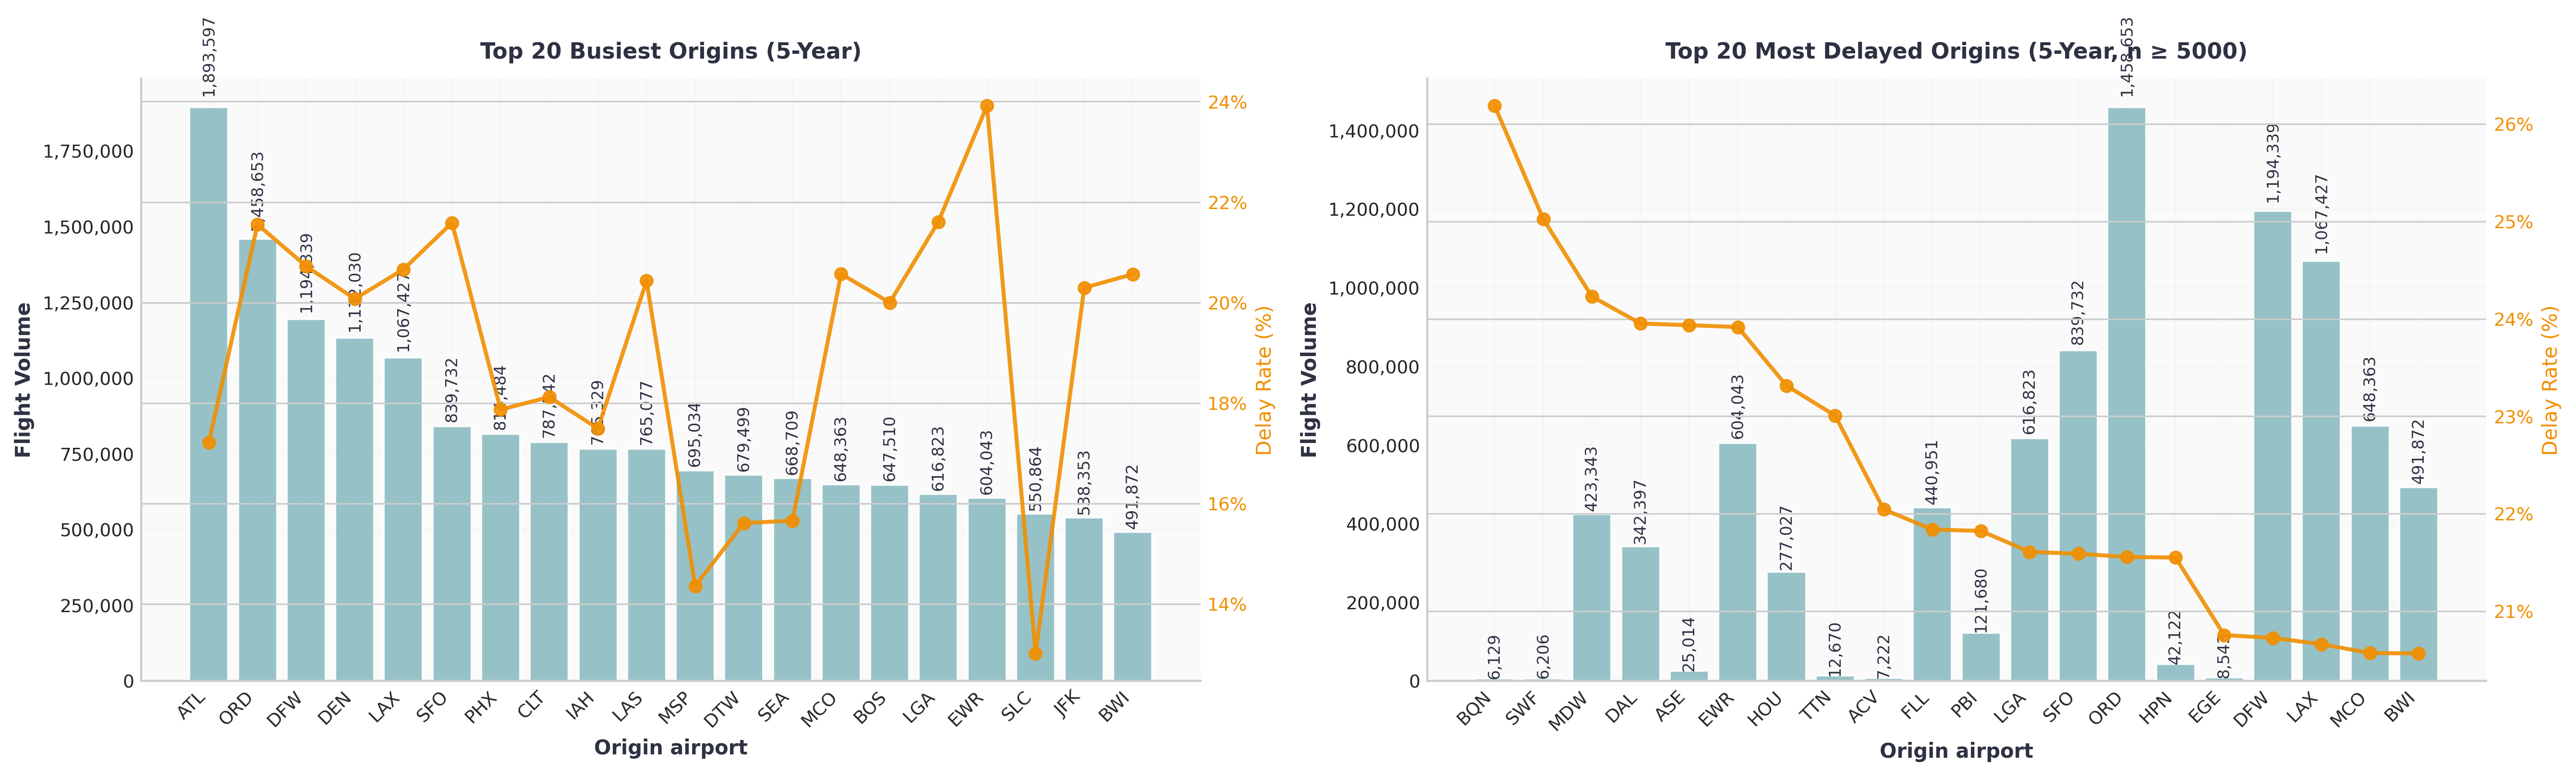


### Busiest vs Most Delayed Origin Airports — 5-Year (2015–2019)

**What this figure shows**

**Left panel – Top 20 busiest origins:**  
Major hubs like ATL, ORD, DFW, DEN, LAX, and SFO handle massive flight volumes.  
Even delay rates around 18–22% translate into a large absolute number of affected flights.

**Right panel – Top 20 most delayed origins (n ≥ 5000):**  
These airports show structural delay problems, with rates often exceeding 25%.  
Volume may be lower, but the probability of delay is significantly higher.

**Overlap insight:**  
A few airports appear in both lists — these are national congestion chokepoints, contributing heavily to delay propagation.

**Why this matters for modeling**

- ORIGIN is a high-signal feature because delays are not evenly distributed geographically.  
- Rolling congestion features amplify this signal.  
- High-volume hubs dominate national delay totals, so model calibration at these airports is especially important.

**Operational takeaway**

Improving processes at a small set of high-volume/high-delay airports  
produces outsized improvements across the entire network.


In [0]:
from IPython.display import Image, display, Markdown

# ---- Display saved figure ----
display(Image(
    filename="/dbfs/student-groups/Group_4_4/Charts_5Y/busiest_vs_most_delayed_two_panel_5y.png",
    width=1100
))

# ---- Display insights ----
display(Markdown("""
### Busiest vs Most Delayed Origin Airports — 5-Year (2015–2019)

**What this figure shows**

**Left panel – Top 20 busiest origins:**  
Major hubs like ATL, ORD, DFW, DEN, LAX, and SFO handle massive flight volumes.  
Even delay rates around 18–22% translate into a large absolute number of affected flights.

**Right panel – Top 20 most delayed origins (n ≥ 5000):**  
These airports show structural delay problems, with rates often exceeding 25%.  
Volume may be lower, but the probability of delay is significantly higher.

**Overlap insight:**  
A few airports appear in both lists — these are national congestion chokepoints, contributing heavily to delay propagation.

**Why this matters for modeling**

- ORIGIN is a high-signal feature because delays are not evenly distributed geographically.  
- Rolling congestion features amplify this signal.  
- High-volume hubs dominate national delay totals, so model calibration at these airports is especially important.

**Operational takeaway**

Improving processes at a small set of high-volume/high-delay airports  
produces outsized improvements across the entire network.
"""))

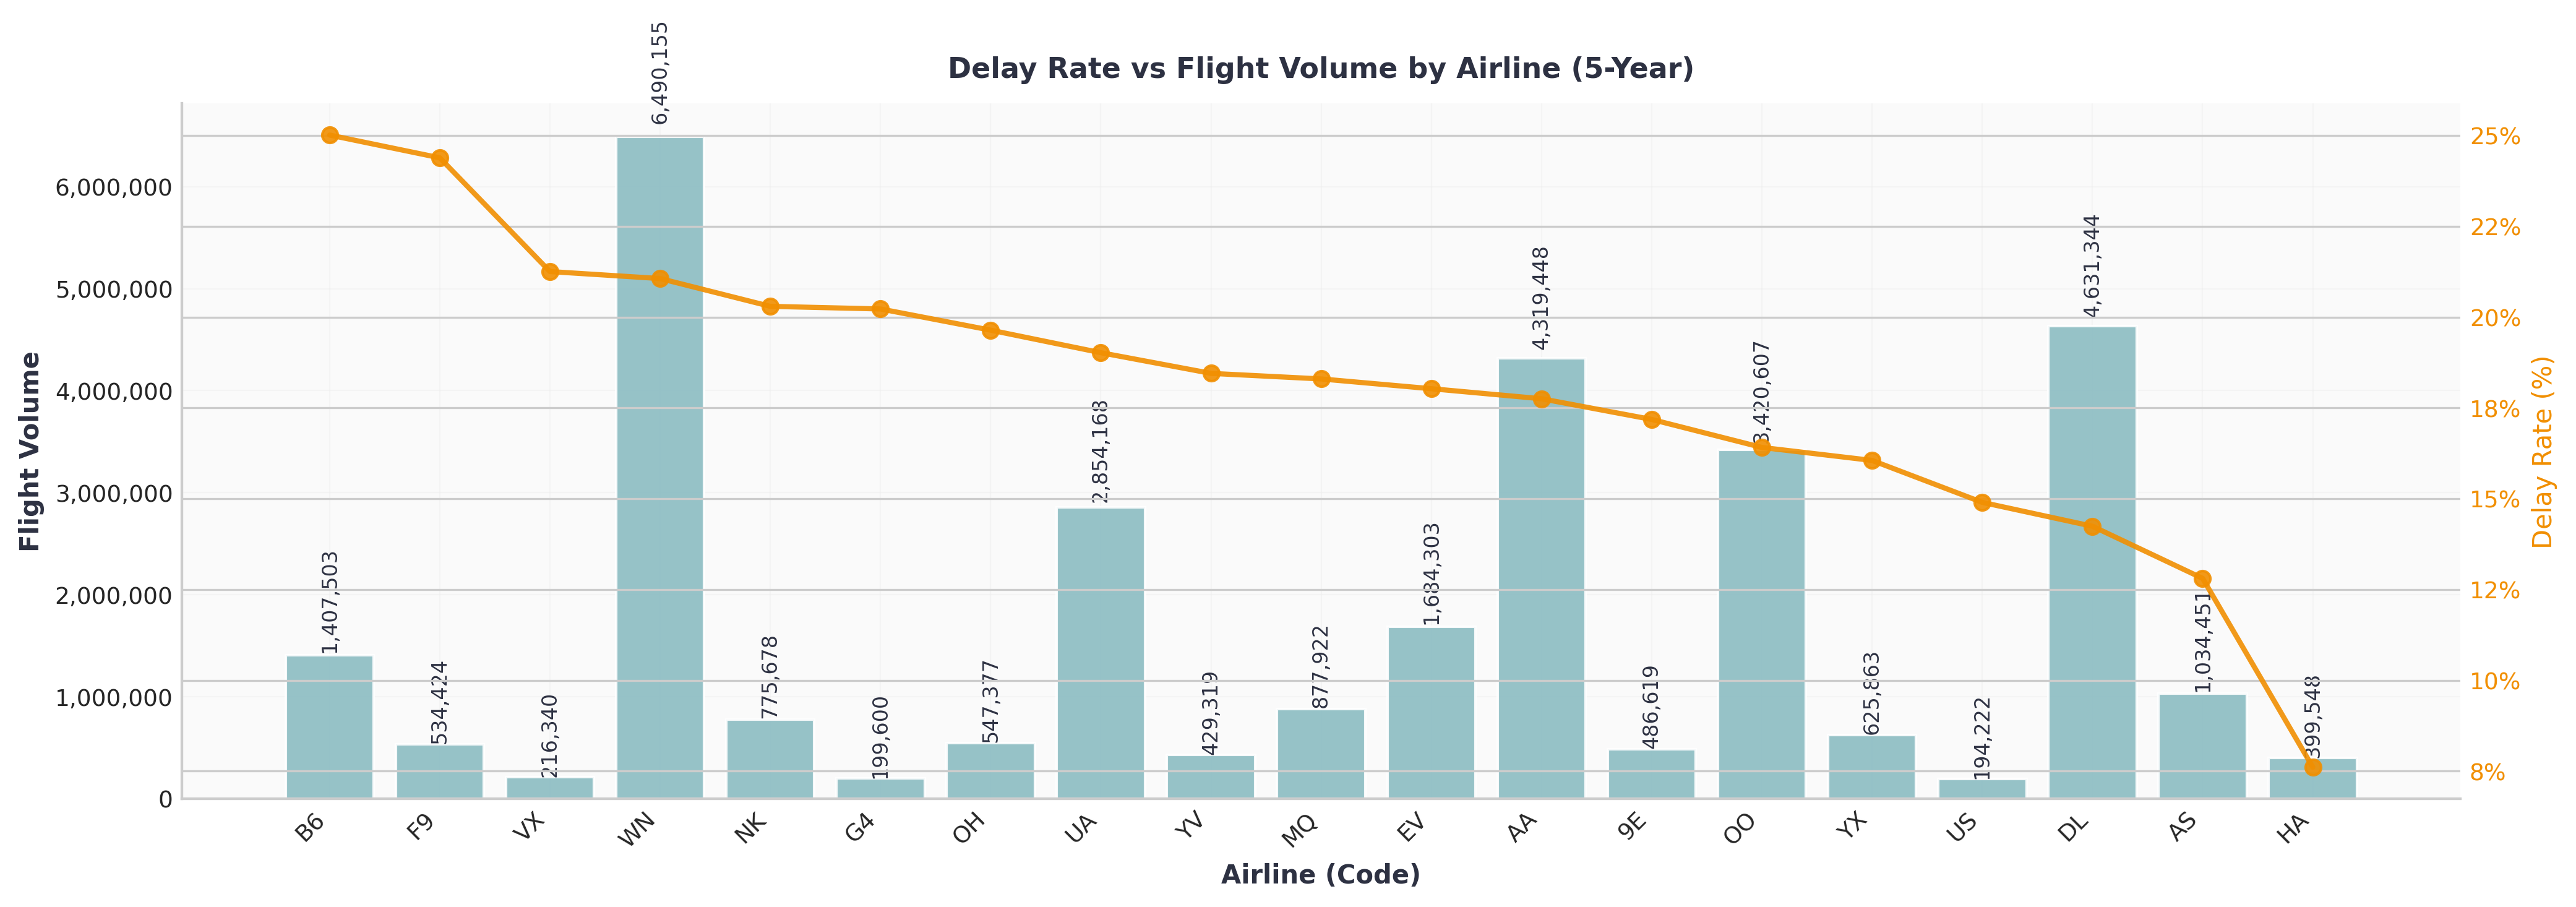


### Delay Rate vs Flight Volume by Airline — 5-Year (sorted by delay rate)

**What the chart shows**

- **Bars** represent total 5-year departures per airline; **line** shows each carrier’s average **delay rate (%)**.  
- Carriers on the left combine **higher delay rates** (often above ~20–25%) with non-trivial volumes, indicating **structurally less reliable operations**.  
- Legacy carriers and some large network airlines toward the right operate **very high volumes** with **delay rates closer to or below the overall average**.

**Why this complements the airport analysis**

- Airport charts describe **where** delays occur; this view explains **who is operating them**.  
- Differences in delay rate by airline remain even after controlling for volume, suggesting **carrier-specific processes, schedules, and recovery strategies** matter.  
- High-volume, low-delay airlines provide a **reference point** for what “good” looks like under similar network conditions.

**Implications for the model**

- `OP_UNIQUE_CARRIER` and carrier-derived features (e.g., **rolling carrier delay rates, reputation category**) should be treated as **high-signal inputs**.  
- The model can learn that the **same route and weather** carries different risk depending on **which airline operates the flight**.  
- This supports more nuanced use cases (e.g., customer messaging, rebooking, or connection risk scoring that depends on carrier behavior).

**Operational takeaway**

- Interventions can be **carrier-specific**:  
  - For high-delay carriers, focus on **turn times, buffer policies, and crew/maintenance planning**.  
  - For high-performing carriers, identify **best practices** that can be replicated across the network.


In [0]:
from IPython.display import Image, display, Markdown

# --- Figure ---
display(Image(
    filename="/dbfs/student-groups/Group_4_4/Charts_5Y/delay_vs_volume_airline_5y.png",
    width=1100
))

# --- Insights ---
display(Markdown("""
### Delay Rate vs Flight Volume by Airline — 5-Year (sorted by delay rate)

**What the chart shows**

- **Bars** represent total 5-year departures per airline; **line** shows each carrier’s average **delay rate (%)**.  
- Carriers on the left combine **higher delay rates** (often above ~20–25%) with non-trivial volumes, indicating **structurally less reliable operations**.  
- Legacy carriers and some large network airlines toward the right operate **very high volumes** with **delay rates closer to or below the overall average**.

**Why this complements the airport analysis**

- Airport charts describe **where** delays occur; this view explains **who is operating them**.  
- Differences in delay rate by airline remain even after controlling for volume, suggesting **carrier-specific processes, schedules, and recovery strategies** matter.  
- High-volume, low-delay airlines provide a **reference point** for what “good” looks like under similar network conditions.

**Implications for the model**

- `OP_UNIQUE_CARRIER` and carrier-derived features (e.g., **rolling carrier delay rates, reputation category**) should be treated as **high-signal inputs**.  
- The model can learn that the **same route and weather** carries different risk depending on **which airline operates the flight**.  
- This supports more nuanced use cases (e.g., customer messaging, rebooking, or connection risk scoring that depends on carrier behavior).

**Operational takeaway**

- Interventions can be **carrier-specific**:  
  - For high-delay carriers, focus on **turn times, buffer policies, and crew/maintenance planning**.  
  - For high-performing carriers, identify **best practices** that can be replicated across the network.
"""))


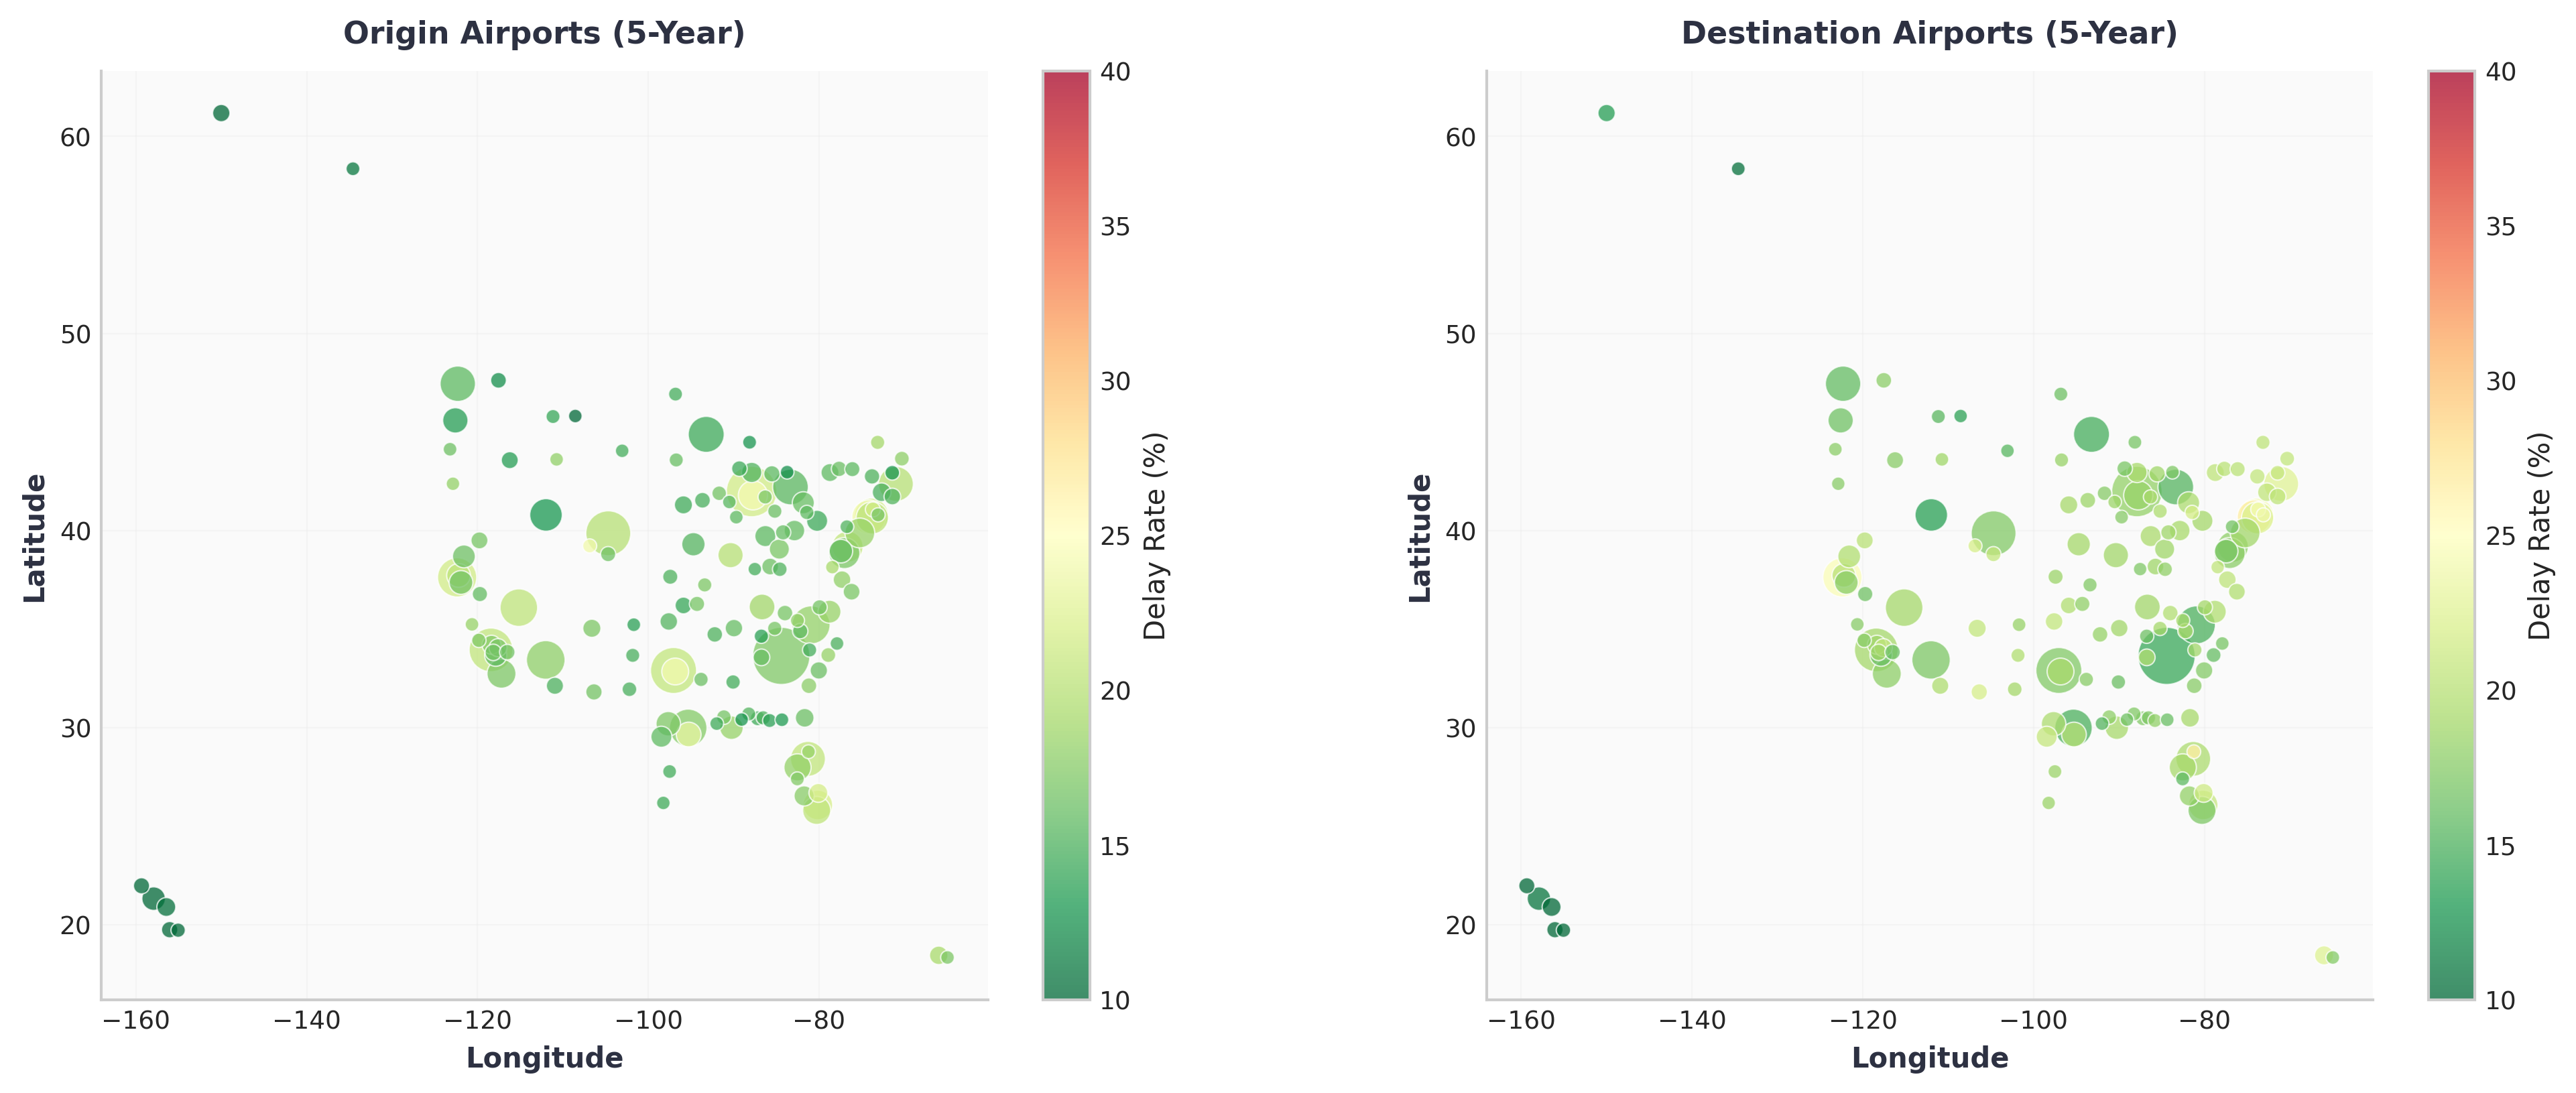


### Geographic Distribution of Delay Risk — Origin & Destination Airports (5-Year)

**What the figure shows**

- Each bubble represents an airport; **size = 5-year flight volume**, **color = delay rate (%)**.  
- Major coastal and hub airports (Northeast corridor, West Coast, large Sunbelt hubs) show up as **large, warm-colored bubbles**, indicating **both high volume and elevated delay rates**.  
- Inland and regional airports tend to be **smaller and greener**, with lower volume and more moderate delay rates.

**Pattern across origin vs destination**

- The **origin panel** highlights where delays are *created* (where flights depart late).  
- The **destination panel** reflects where delays **accumulate**, often mirroring major hub structures but also capturing routes into congested regions.  
- Overlap between large, high-delay origins and destinations points to **bidirectional congestion corridors**.

**Implications for the model**

- Geographic structure is not noise — delay risk is **strongly spatially clustered**.  
- Combining `ORIGIN` / `DEST` with spatially-aware features (airport centrality, weather severity, rolling delay stats) helps the model learn **where delay is more likely to propagate**.  
- Capturing these patterns is key for **2-hour-ahead risk scoring**: the same schedule looks very different departing from a chronic bottleneck vs a low-congestion field.

**Operational takeaway**

- Network-wide improvement is unlikely without **focused interventions on a geographically concentrated set of airports and corridors** that act as delay “hot zones.”


In [0]:
from IPython.display import Image, display, Markdown

# --- Figure ---
display(Image(
    filename="/dbfs/student-groups/Group_4_4/Charts_5Y/geo_panel_5y.png",
    width=1100
))

# --- Insights ---
display(Markdown("""
### Geographic Distribution of Delay Risk — Origin & Destination Airports (5-Year)

**What the figure shows**

- Each bubble represents an airport; **size = 5-year flight volume**, **color = delay rate (%)**.  
- Major coastal and hub airports (Northeast corridor, West Coast, large Sunbelt hubs) show up as **large, warm-colored bubbles**, indicating **both high volume and elevated delay rates**.  
- Inland and regional airports tend to be **smaller and greener**, with lower volume and more moderate delay rates.

**Pattern across origin vs destination**

- The **origin panel** highlights where delays are *created* (where flights depart late).  
- The **destination panel** reflects where delays **accumulate**, often mirroring major hub structures but also capturing routes into congested regions.  
- Overlap between large, high-delay origins and destinations points to **bidirectional congestion corridors**.

**Implications for the model**

- Geographic structure is not noise — delay risk is **strongly spatially clustered**.  
- Combining `ORIGIN` / `DEST` with spatially-aware features (airport centrality, weather severity, rolling delay stats) helps the model learn **where delay is more likely to propagate**.  
- Capturing these patterns is key for **2-hour-ahead risk scoring**: the same schedule looks very different departing from a chronic bottleneck vs a low-congestion field.

**Operational takeaway**

- Network-wide improvement is unlikely without **focused interventions on a geographically concentrated set of airports and corridors** that act as delay “hot zones.”
"""))
